In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import mode
import umap as UMAP

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff') # 70000 imágenes de 28x28 píxels
data = mnist.data[:10000] / 255 # Normalizar datos entre 0 y 1
labels = mnist.target[:10000].astype(int)

In [3]:
umap = UMAP.UMAP(n_components=2, n_neighbors=12)
start_time = time.time()
data_umap = umap.fit_transform(data)
umap_time = time.time() - start_time

print(f"UMAP completado en {umap_time:.2f} segundos.")
data_umap.shape

UMAP completado en 38.61 segundos.


(10000, 2)

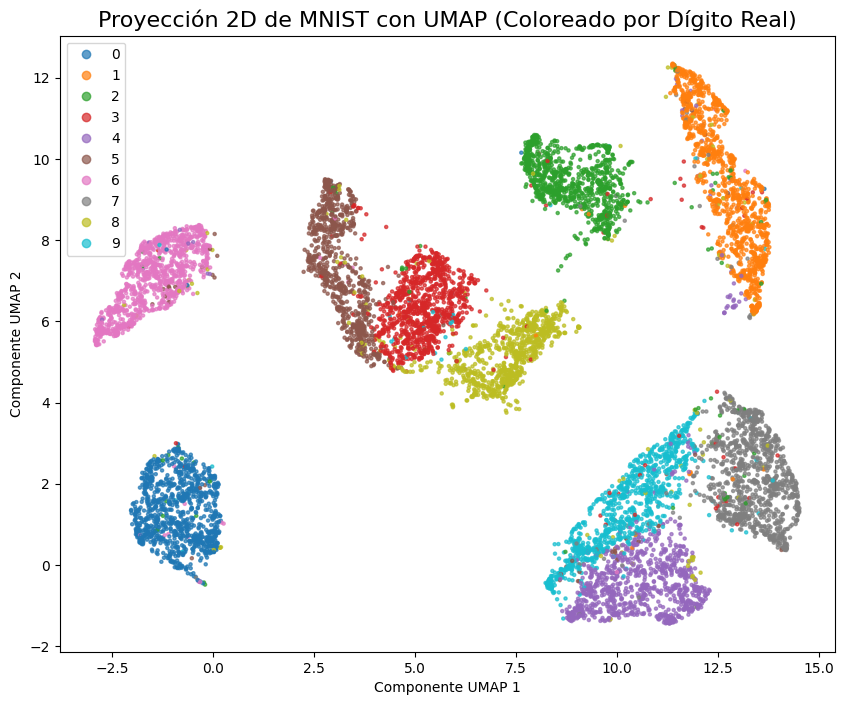

In [8]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='tab10', s=5, alpha=0.7)
plt.title('Proyección 2D de MNIST con UMAP (Coloreado por Dígito Real)', fontsize=16)
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.show()

In [10]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_umap)

In [13]:
labels_map = np.zeros(10)
for i in range(10):
    mask = kmeans_labels == i # Genera una lista con 0 y 1 (1 cuando la etiqueta coincide con la asignada por kmeans)
    # Convertir labels a tipo numérico antes de usar mode
    labels_map[i] = mode(labels[mask].astype(int), keepdims=True)[0][0] # Busca el número más común (usando las etiquetas originales y le reasigna ese número a kmeans)

labels_pred = np.array([labels_map[label] for label in kmeans_labels])

accuracy = accuracy_score(labels.astype(int), labels_pred) # También convertir labels a int para accuracy_score
accuracy

0.8271

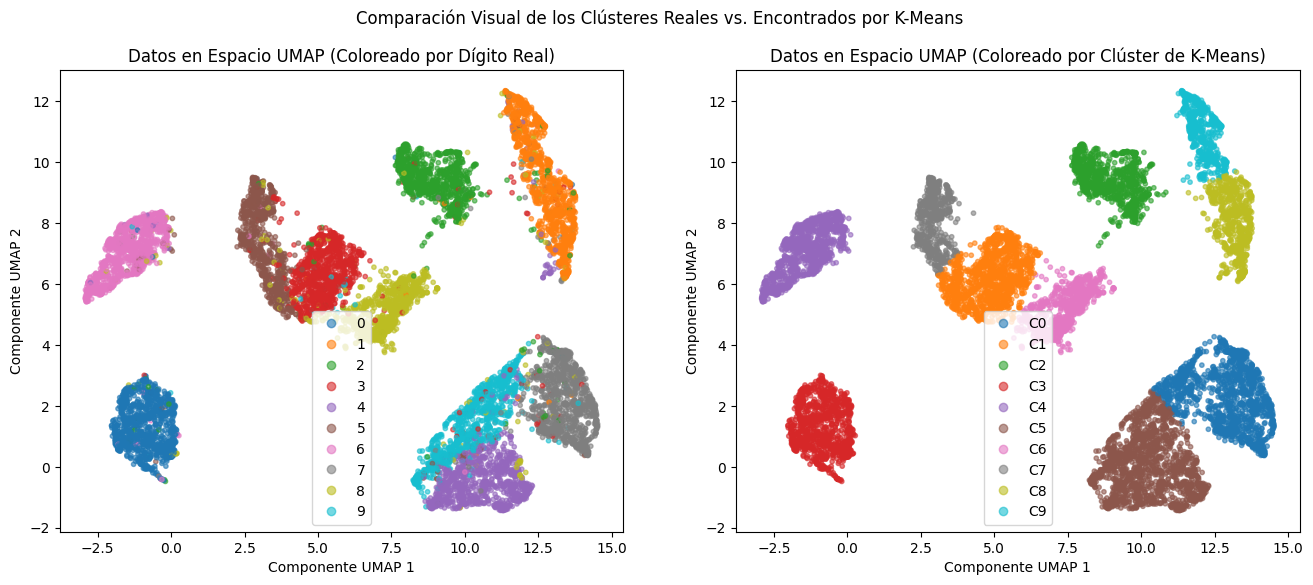

In [14]:
# Gráfico 1: Scatter plot de los datos en los dos primeros componentes principales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Coloreado por etiquetas verdaderas
scatter1 = axes[0].scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='tab10', alpha=0.6, s=10)
axes[0].set_title('Datos en Espacio UMAP (Coloreado por Dígito Real)')
axes[0].set_xlabel('Componente UMAP 1')
axes[0].set_ylabel('Componente UMAP 2')
axes[0].legend(handles=scatter1.legend_elements()[0], labels=list(range(10)))

# Coloreado por clústeres encontrados por K-Means
scatter2 = axes[1].scatter(data_umap[:, 0], data_umap[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.6, s=10)
axes[1].set_title('Datos en Espacio UMAP (Coloreado por Clúster de K-Means)')
axes[1].set_xlabel('Componente UMAP 1')
axes[1].set_ylabel('Componente UMAP 2')
axes[1].legend(handles=scatter2.legend_elements()[0], labels=[f'C{i}' for i in range(10)])

plt.suptitle("Comparación Visual de los Clústeres Reales vs. Encontrados por K-Means")
plt.show()

Generando Matriz de Confusión...


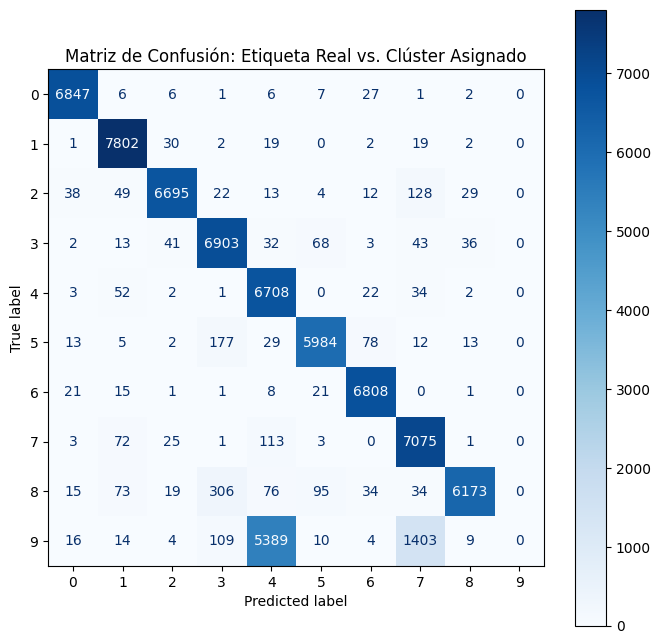

In [19]:
print("Generando Matriz de Confusión...")
cm = confusion_matrix(labels, labels_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusión: Etiqueta Real vs. Clúster Asignado")
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
agglo_labels = agglo.fit_predict(data_umap)


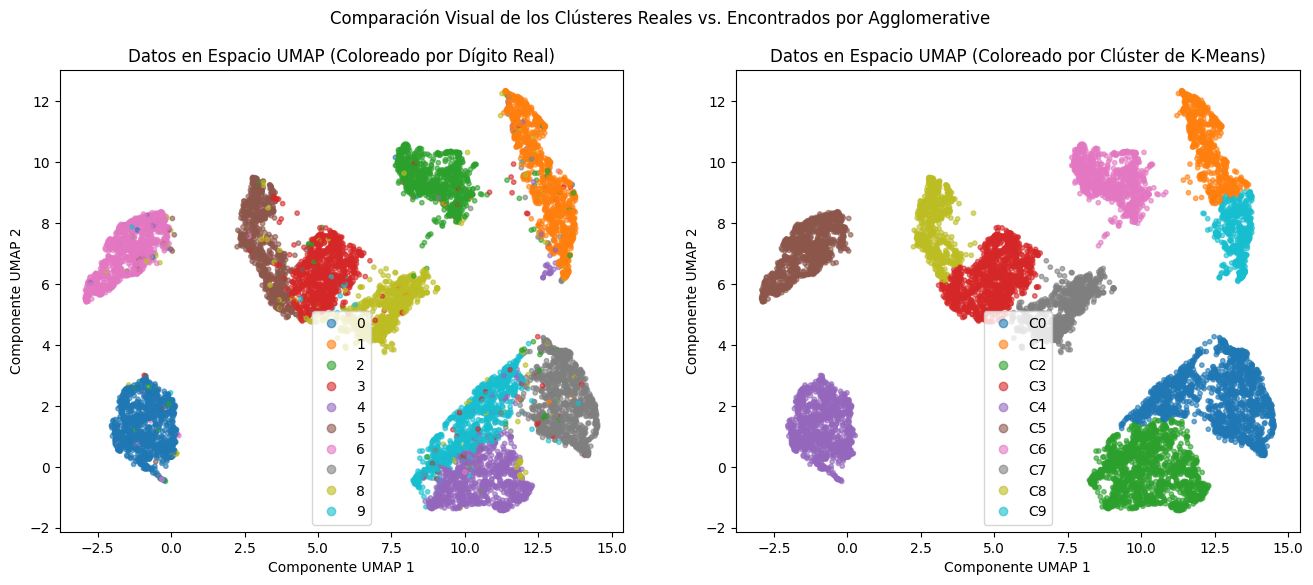

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Coloreado por etiquetas verdaderas
scatter1 = axes[0].scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='tab10', alpha=0.6, s=10)
axes[0].set_title('Datos en Espacio UMAP (Coloreado por Dígito Real)')
axes[0].set_xlabel('Componente UMAP 1')
axes[0].set_ylabel('Componente UMAP 2')
axes[0].legend(handles=scatter1.legend_elements()[0], labels=list(range(10)))

# Coloreado por clústeres encontrados por Agglomerative Clustering
scatter2 = axes[1].scatter(data_umap[:, 0], data_umap[:, 1], c=agglo_labels, cmap='tab10', alpha=0.6, s=10)
axes[1].set_title('Datos en Espacio UMAP (Coloreado por Clúster de K-Means)')
axes[1].set_xlabel('Componente UMAP 1')
axes[1].set_ylabel('Componente UMAP 2')
axes[1].legend(handles=scatter2.legend_elements()[0], labels=[f'C{i}' for i in range(10)])

plt.suptitle("Comparación Visual de los Clústeres Reales vs. Encontrados por Agglomerative")
plt.show()

In [68]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=20) # eps -> radio, min_samples -> puntos mínimos
dbscan_labels = dbscan.fit_predict(data_umap)

/tmp/ipython-input-3930114283.py:15: UserWarning: Mismatched number of handles and labels: len(handles) = 8 len(labels) = 10
  axes[1].legend(handles=scatter2.legend_elements()[0], labels=[f'C{i}' for i in range(10)])


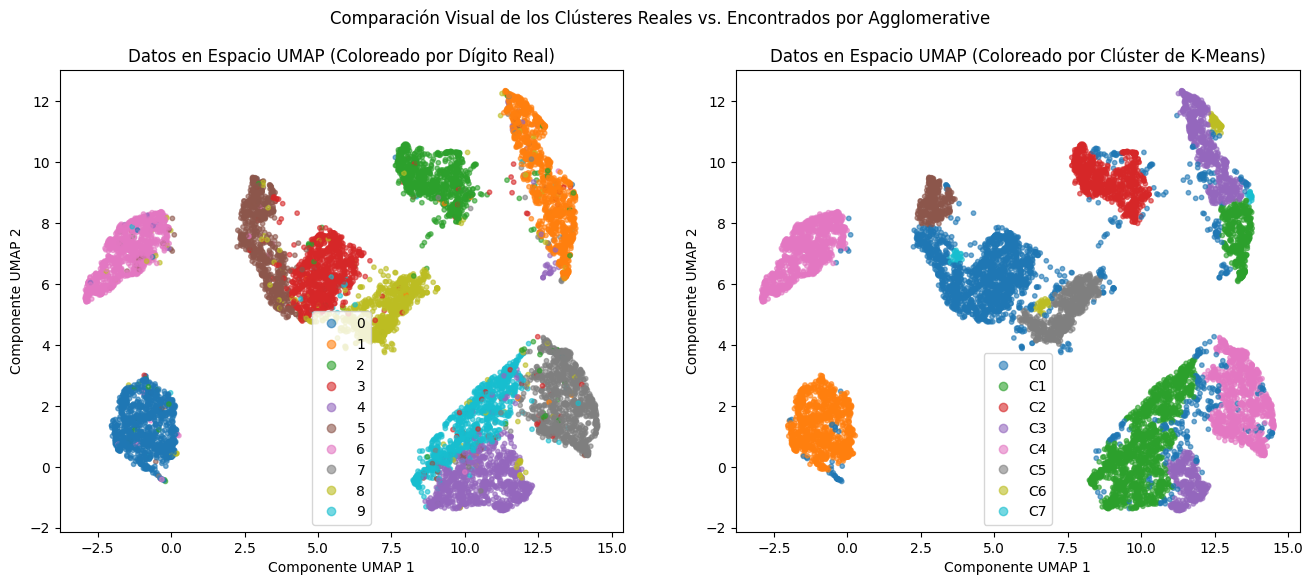

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Coloreado por etiquetas verdaderas
scatter1 = axes[0].scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='tab10', alpha=0.6, s=10)
axes[0].set_title('Datos en Espacio UMAP (Coloreado por Dígito Real)')
axes[0].set_xlabel('Componente UMAP 1')
axes[0].set_ylabel('Componente UMAP 2')
axes[0].legend(handles=scatter1.legend_elements()[0], labels=list(range(10)))

# Coloreado por clústeres encontrados por Agglomerative Clustering
scatter2 = axes[1].scatter(data_umap[:, 0], data_umap[:, 1], c=dbscan_labels, cmap='tab10', alpha=0.6, s=10)
axes[1].set_title('Datos en Espacio UMAP (Coloreado por Clúster de K-Means)')
axes[1].set_xlabel('Componente UMAP 1')
axes[1].set_ylabel('Componente UMAP 2')
axes[1].legend(handles=scatter2.legend_elements()[0], labels=[f'C{i}' for i in range(10)])

plt.suptitle("Comparación Visual de los Clústeres Reales vs. Encontrados por Agglomerative")
plt.show()